In [16]:
from MakeBallBounceSetup import MakeManipulationStation
# Imports
import numpy as np
import altair as alt
import pydot
from IPython.display import display, SVG, clear_output
import plotly.express as px

from pydrake.all import (
    AddMultibodyPlantSceneGraph, AngleAxis, BasicVector, 
    DiagramBuilder, FindResourceOrThrow, Integrator, JacobianWrtVariable, 
    LeafSystem, MeshcatVisualizerCpp, MultibodyPlant, MultibodyPositionToGeometryPose, Parser,
    PiecewisePose, PiecewisePolynomial, Quaternion, RigidTransform, 
    RollPitchYaw, RotationMatrix, SceneGraph, Simulator, TrajectorySource
)
from pydrake.examples.manipulation_station import ManipulationStation


from manipulation.meshcat_cpp_utils import (
    StartMeshcat, AddMeshcatTriad)
from manipulation.scenarios import AddMultibodyTriad, SetColor

# TODO(russt): Move this to drake (adding the element name support to the base class).
import pandas as pd
def dataframe(trajectory, times, names):
  assert trajectory.rows() == len(names)
  values = trajectory.vector_values(times)
  data = {'t': times }
  for i in range(len(names)):
    data[names[i]] = values[i,:]
  return pd.DataFrame(data)

In [17]:
meshcat = StartMeshcat()

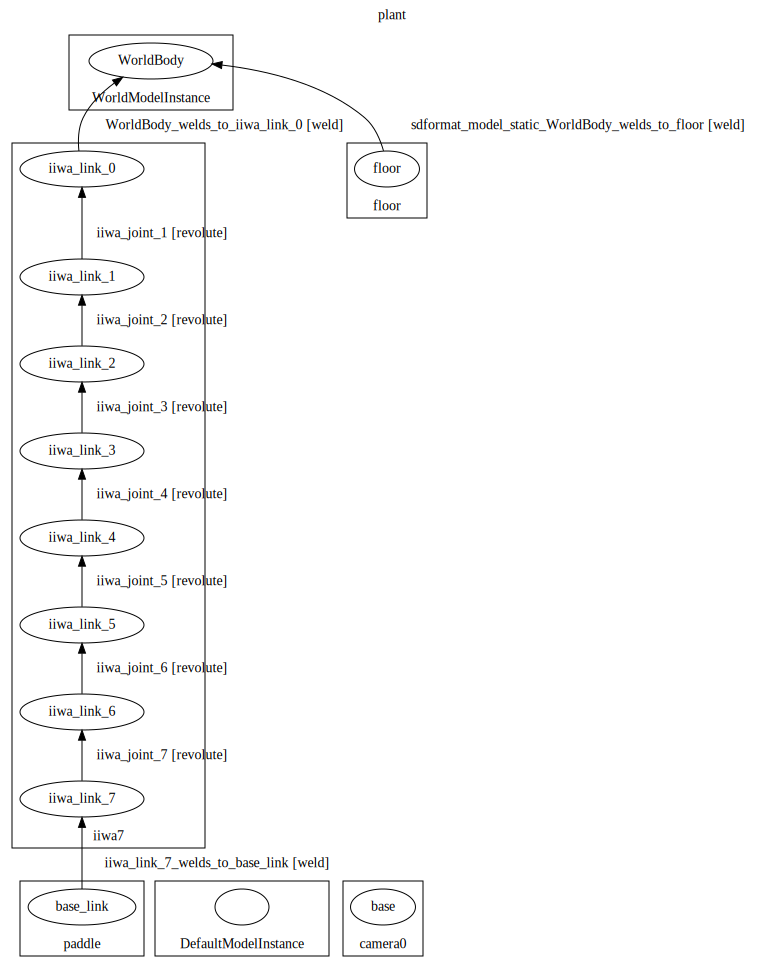

[9.56181152e-01 1.36054129e-16 5.81819597e-01]


In [22]:
meshcat.Delete()
def station_test():
    builder = DiagramBuilder()
    diag, plant = MakeManipulationStation()
    station = builder.AddSystem(diag)

    visualizer = MeshcatVisualizerCpp.AddToBuilder(
        builder,station.GetOutputPort("geometry_query"), meshcat)
    
    temp_context = station.CreateDefaultContext()
    
    #display(SVG(pydot.graph_from_dot_data(plant.GetTopologyGraphvizString())[0].create_svg()))
    temp_plant_context = plant.GetMyContextFromRoot(temp_context)
    X_G = plant.EvalBodyPoseInWorld(temp_plant_context, plant.GetBodyByName("base_link"))
    print(X_G.translation())
    diagram = builder.Build()
    simulator = Simulator(diagram)

    context = simulator.get_context()
    station_context = station.GetMyContextFromRoot(context)

    station.GetInputPort("iiwa_position").FixValue(station_context, [0, np.pi/2, 0, -np.pi/2, 0, -np.pi/4, 0])
    

   
    #visualizer.start_recording()

    AddMeshcatTriad(meshcat,"InitialPose",X_PT=X_G)
    simulator.AdvanceTo(.01)
    ##visualizer.stop_recording()
    #isualizer.publish_recording()


station_test()